# Memahami Citra

## Silakan jalankan file ini sedikit demi sedikit. Pahami kodenya dan konsep di dalamnya.

Notebook ini akan mengenalkan pada kita langkah-langkah pertama proses pengolahan citra menggunakan OpenCV. 

Presentasi ini diambil dari berbagai sumber di buku dan di internet, di antaranya presentasi oleh Satya Mallick dan rekannya serta presentasi oleh Kashif Murtaza dan rekannya.

## Importing the Libraries


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image

## Understanding the "0 to 255" scale and Color Map

In [2]:
im = np.arange(256)
im = im[np.newaxis,:]
im = np.repeat(im,100,axis=0)

print(im)

[[  0   1   2 ... 253 254 255]
 [  0   1   2 ... 253 254 255]
 [  0   1   2 ... 253 254 255]
 ...
 [  0   1   2 ... 253 254 255]
 [  0   1   2 ... 253 254 255]
 [  0   1   2 ... 253 254 255]]


In [3]:
type(im)

numpy.ndarray

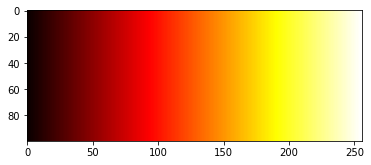

In [4]:
plt.imshow(im,cmap='hot')

In [ ]:
## other cmap to choose from:
## 'viridis', 'plasma', 'inferno', 'magma', 'cividis'
## 'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds', 
## 'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
## 'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn'
## 'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone',
## 'pink', 'spring', 'summer', 'autumn', 'winter', 'cool',
## 'Wistia', 'hot', 'afmhot', 'gist_heat', 'copper'
## ..........
## ..........
## And many more:
## https://matplotlib.org/stable/tutorials/colors/colormaps.html

## Display Image Directly
We will use the following as our sample images. We will use the ipython image function to load and display the image.

In [5]:
# Display 18x18 pixel image.
Image(filename='checkerboard_18x18.png') 

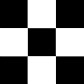

In [6]:
# Display 84x84 pixel image.
Image(filename='checkerboard_84x84.jpg') 

## Reading images using OpenCV
OpenCV allows reading different types of images (JPG, PNG, etc). You can load grayscale images, color images or you can also load images with Alpha channel. It uses the **`cv2.imread()`** function which has the following syntax:

### <font color="green">Function Syntax </font>
``` python
retval = cv2.imread( filename[, flags] )
```

`retval`: Is the image if it is successfully loaded. Otherwise it is `None`. This may happen if the filename is wrong or the file is corrupt.

The function has **1 required input argument** and one optional flag:


1. `filename`: This can be an **absolute** or **relative** path. This is a **mandatory argument**.
2. `Flags`:    These flags are used to read an image in a particular format (for example, grayscale/color/with alpha channel). This is an **optional argument** with a default value of `cv2.IMREAD_COLOR` or `1` which loads the image as a color image.

Before we proceed with some examples, let's also have a look at some of the `flags` available.

**Flags**
1. **`cv2.IMREAD_GRAYSCALE`** or **`0`**: Loads image in grayscale mode
2. **`cv2.IMREAD_COLOR`** or **`1`**: Loads a color image. Any transparency of image will be neglected. It is the default flag.
3. **`cv2.IMREAD_UNCHANGED`** or **`-1`**: Loads image as such including alpha channel.


In [7]:
# Read image as gray scale.
cb_img = cv2.imread("checkerboard_18x18.png",0)

# Print the image data (pixel values), element of a 2D numpy array.
# Each pixel value is 8-bits [0,255]
print(cb_img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

In [8]:
type(cb_img)

numpy.ndarray

In [9]:
# Display Image attributes
# print the size  of image
print("Image size is ", cb_img.shape)

# print data-type of image
print("Data type of image is ", cb_img.dtype)

Image size is  (18, 18)
Data type of image is  uint8


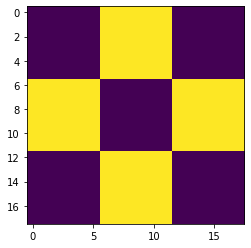

In [10]:
# Display Images using Matplotlib
plt.imshow(cb_img)

### What happened?
Even though the image was read in as a gray scale image, it won't necessarily display in gray scale when using `imshow()`. matplotlib uses different color maps and it's possible that the gray scale color map is not set.

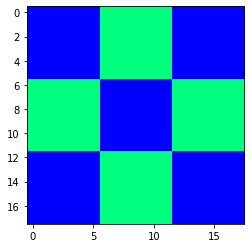

In [11]:
# Set color map to gray scale for proper rendering.
plt.imshow(cb_img, cmap='winter')

## Example: fuzzy checkerboard

[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

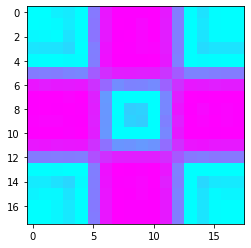

In [12]:
# Read image as gray scale.
cb_img_fuzzy = cv2.imread("checkerboard_fuzzy_18x18.jpg",0)

# print image
print(cb_img_fuzzy)

# Display image.
plt.imshow(cb_img_fuzzy,cmap='cool')

## Example: photo in 1 channel / grayscale


In [14]:
im = plt.imread(r'albert-einstein_gray.jpeg')
print( type(im) )
print( im.shape )
print( im.dtype )

<class 'numpy.ndarray'>
(949, 728)
uint8


In [21]:
np.ndarray.flags

<attribute 'flags' of 'numpy.ndarray' objects>

In [22]:
a = np.zeros((3,3))

In [23]:
a.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [24]:
a.flags['WRITEABLE'] = True

In [27]:
a.flags.writeable = True

In [31]:
print(im.flags)

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False



In [33]:
albert = im.copy()

In [34]:
print(type(albert))

<class 'numpy.ndarray'>


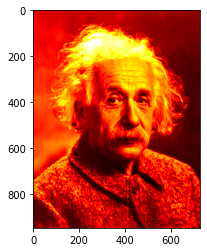

In [35]:
plt.imshow(albert, cmap='hot')

In [36]:
albert

array([[85, 85, 85, ..., 62, 62, 62],
       [85, 85, 85, ..., 64, 65, 64],
       [85, 85, 85, ..., 59, 59, 58],
       ...,
       [36, 42, 42, ..., 36, 42, 47],
       [29, 37, 37, ..., 36, 43, 44],
       [33, 40, 37, ..., 35, 43, 42]], dtype=uint8)

### Accessing and Altering Pixels


In [37]:
albert[233,456]

166

In [42]:
albert[100:100,100:110] = 0 # Sebuah kotak putih di gambar

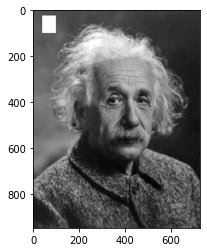

In [43]:
plt.imshow(albert, cmap='gray')

## Working with Color Images
Until now, we have been using gray scale images in our discussion. Let us now discuss color images.

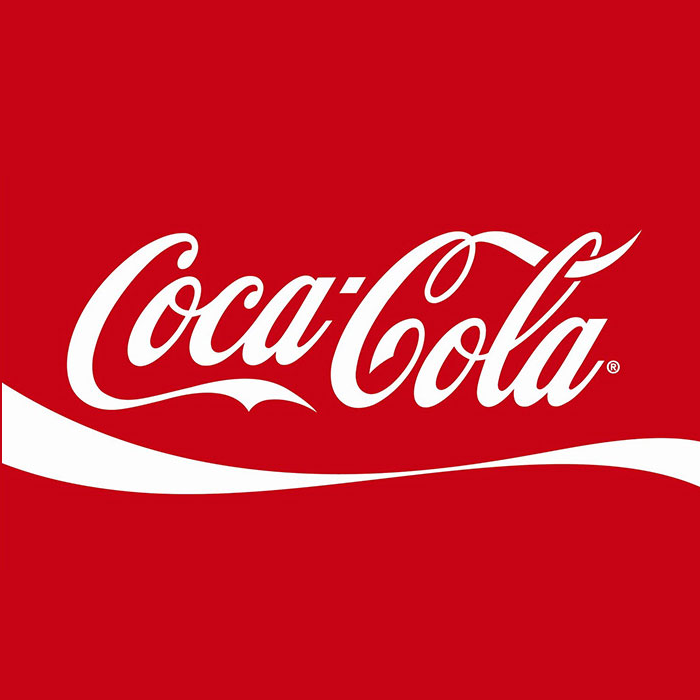

In [30]:
# Read and display Coca-Cola logo.
Image("coca-cola-logo.png") ## using function from IPython, not cv2

## Read and display color image using OpenCV
Let us read a color image and check the parameters. Note the image dimension.

In [44]:
# Read in image
coke_img = cv2.imread("coca-cola-logo.png",1)

# What is its data structure?
print("Data structure is of", type(coke_img) )

# print the size  of image
print("Image size is ", coke_img.shape)

# print data-type of image
print("Data type of image is ", coke_img.dtype)

print("")

Data structure is of <class 'numpy.ndarray'>
Image size is  (700, 700, 3)
Data type of image is  uint8



## Display the Image

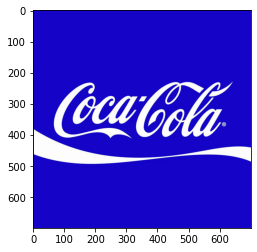

In [45]:
plt.imshow(coke_img)
#  What happened?

The color displayed above is different from the actual image. This is because matplotlib expects the image in RGB format whereas OpenCV stores images in BGR format. Thus, for correct display, we need to reverse the channels of the image. We will discuss about the channels in the sections below.

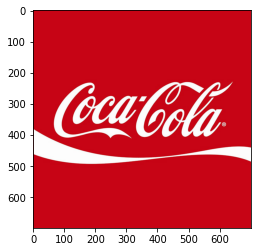

In [46]:
coke_img_channels_reversed = coke_img[:, :, ::-1]
plt.imshow(coke_img_channels_reversed)

## Splitting and Merging Color Channels


**`cv2.split()`** Divides a multi-channel array into several single-channel arrays.

**`cv2.merge()`** Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.

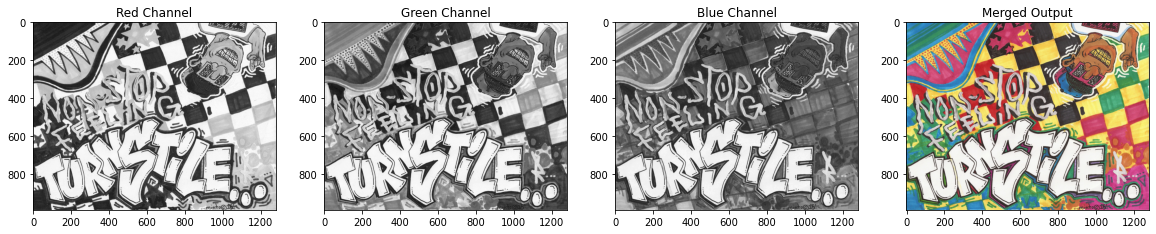

In [49]:
# Split the image into the B,G,R components
img_keren_bgr = cv2.imread("nonfell.jpg",cv2.IMREAD_COLOR)
b,g,r = cv2.split(img_keren_bgr)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title("Red Channel");
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title("Green Channel");
plt.subplot(143);plt.imshow(b,cmap='gray');plt.title("Blue Channel");

# Merge the individual channels into a BGR image
imgMerged = cv2.merge((b,g,r))
# Show the merged output
plt.subplot(144);plt.imshow(imgMerged[:,:,::-1]);plt.title("Merged Output");

### Changing from BGR to RGB

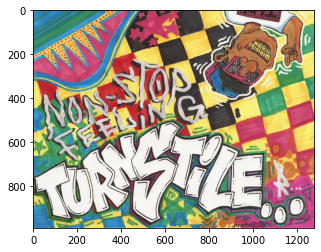

In [50]:
# OpenCV stores color channels in a differnet order than most other applications (BGR vs RGB).
img_keren_rgb = cv2.cvtColor(img_keren_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_keren_rgb)

### Changing to HSV color space

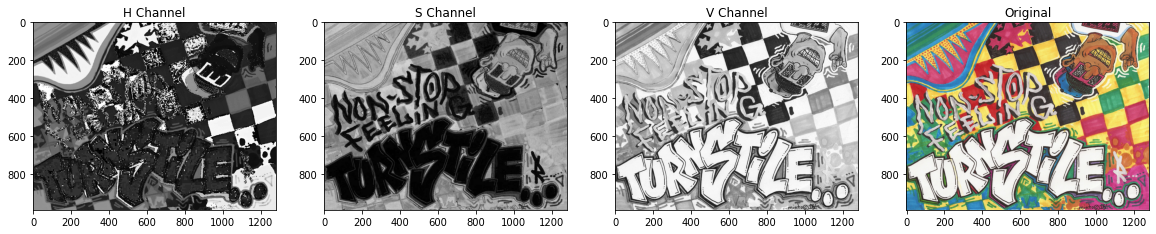

In [51]:
img_hsv = cv2.cvtColor(img_keren_bgr, cv2.COLOR_BGR2HSV)
# Split the image into the H,S,V components
h,s,v = cv2.split(img_hsv)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h,cmap='gray');plt.title("H Channel");
plt.subplot(142);plt.imshow(s,cmap='gray');plt.title("S Channel");
plt.subplot(143);plt.imshow(v,cmap='gray');plt.title("V Channel");
plt.subplot(144);plt.imshow(img_keren_rgb);plt.title("Original");

## Modifying individual Channel

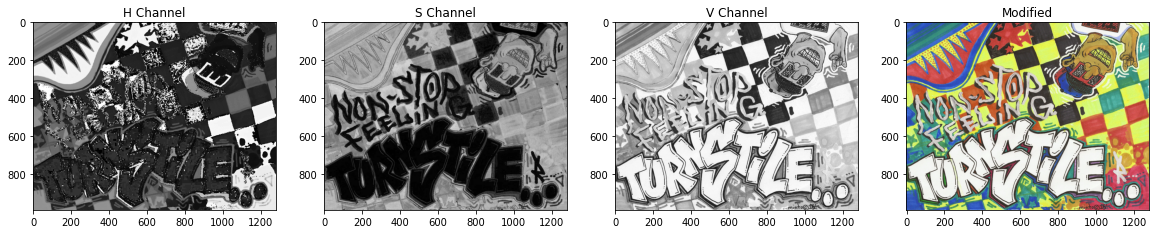

In [52]:
h_new = h+10 ###

img_keren_merged = cv2.merge((h_new,s,v))
img_keren_rgb = cv2.cvtColor(img_keren_merged, cv2.COLOR_HSV2RGB)

# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h,cmap='gray');plt.title("H Channel");
plt.subplot(142);plt.imshow(s,cmap='gray');plt.title("S Channel");
plt.subplot(143);plt.imshow(v,cmap='gray');plt.title("V Channel");
plt.subplot(144);plt.imshow(img_keren_rgb);plt.title("Modified");

## Saving Images

Saving the image is as trivial as reading an image in OpenCV. We use the function **`cv2.imwrite()`** with two arguments. The first one is the filename, second argument is the image object.

The function imwrite saves the image to the specified file. The image format is chosen based on the filename extension (see cv::imread for the list of extensions). In general, only 8-bit single-channel or 3-channel (with 'BGR' channel order) images can be saved using this function (see the OpenCV documentation for further details).

	
### <font style="color:rgb(8,133,37)">Function Syntax </font>
``` python
cv2.imwrite( filename, img[, params] )
```

The function has **2 required arguments**:

1. `filename`: This can be an **absolute** or **relative** path. 
2. `img`: Image or Images to be saved.

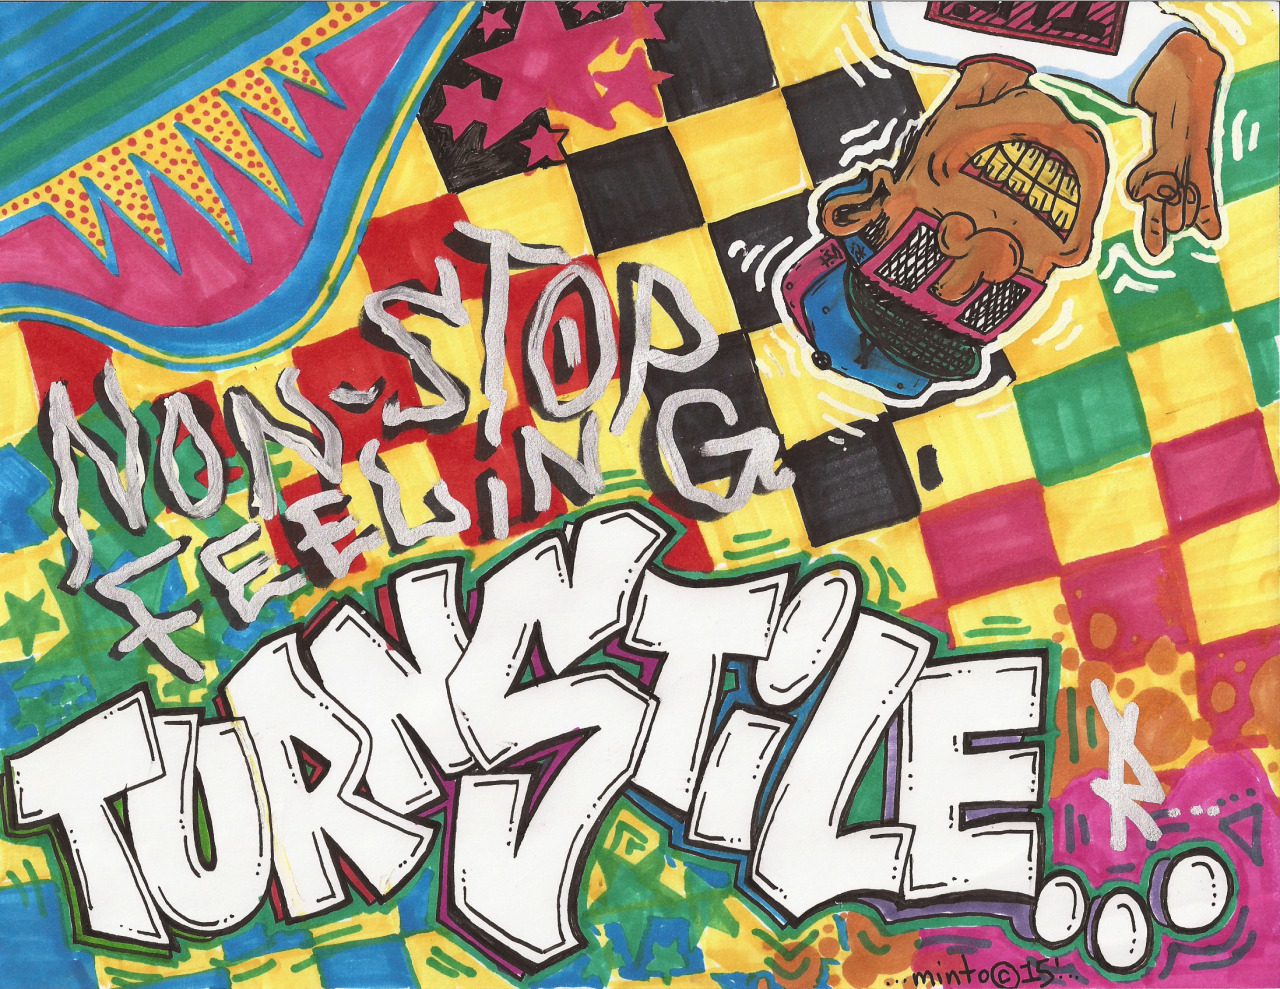

In [53]:
# save the image
cv2.imwrite("turnstile_nonstopfeeling.png", img_keren_bgr)

Image(filename='turnstile_nonstopfeeling.png') 

In [ ]:
# read the image as Color
img_KLAYAR_bgr = cv2.imread("Pantai_Klayar_SAVED.png", cv2.IMREAD_COLOR)
print("img_KLAYAR_bgr shape is: ", img_KLAYAR_bgr.shape)

# read the image as Grayscaled
img_KLAYAR_gry = cv2.imread("Pantai_Klayar_SAVED.png", cv2.IMREAD_GRAYSCALE)
print("img_KLAYAR_gry shape is: ", img_KLAYAR_gry.shape)